In [2]:
import os 
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split    
from keras.utils import to_categorical
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
data_dir = 'data'
# classes but only the directories
files = os.listdir(data_dir)
classes = [f for f in files if os.path.isdir(os.path.join(data_dir, f))]

print(sorted(classes))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [4]:
X = []
y = []

for i, c in enumerate(classes):
    files = os.listdir(os.path.join(data_dir, c))
    files = [f for f in files if f.endswith('.png')]
    print(f'{c}: {len(files)}')

    for f in files:
        img = Image.open(os.path.join(data_dir, c, f))
        img = img.resize((28, 28))
        img = np.array(img)
        img = img / 255
        img = img.astype(np.float32)
        # Check the shape of the image after resizing
        print(img.shape)
        X.append(img)
        y.append(i)

# Convert lists to arrays
X = np.array(X)
y = np.array(y)

9: 100
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 4)
(28, 28, 

In [5]:
# print the shape of the arrays
print(X.shape)
print(y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Save the data
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)
np.save('classes.npy', classes)

print('Data saved')


(1000, 28, 28, 4)
(1000,)
Data saved


In [6]:
# Load the data
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')
classes = np.load('classes.npy')

print('Data loaded')
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(sorted(classes))



Data loaded
(800, 28, 28, 4)
(200, 28, 28, 4)
(800, 10)
(200, 10)
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


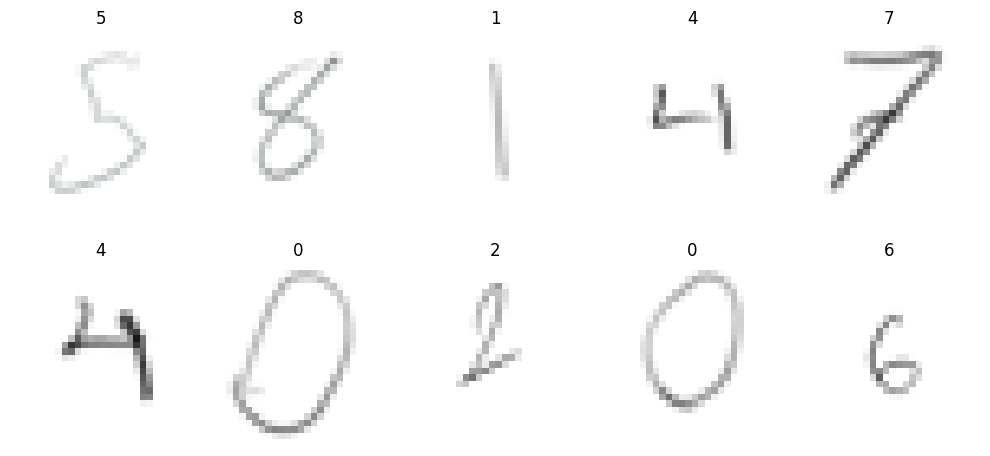

In [7]:
# print a random sample images
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    idx = np.random.randint(0, X_train.shape[0])
    axes[i].imshow(X_train[idx])
    axes[i].set_title(classes[np.argmax(y_train[idx])])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

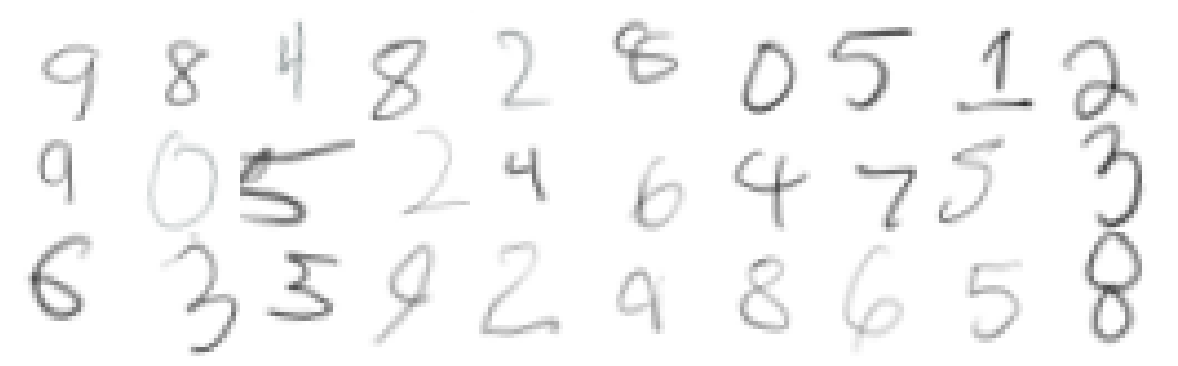

Shape of augmented dataset: 3136


In [19]:
# data augmentation
datagen = ImageDataGenerator(
      rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

# PREVIEW AUGMENTED IMAGES
X_train3 = X_train[799,].reshape((1,28,28,4))
Y_train3 = y_train[799,].reshape((1,10))

# PREVIEW AUGMENTED IMAGES FOR THE WHOLE DATASET
plt.figure(figsize=(15, 4.5))
for i in range(len(X_train)):
    plt.subplot(3, 10, i % 30 + 1)  # Limiting to show 30 images
    X_train_example = X_train[i].reshape((1, 28, 28, 4))
    Y_train_example = y_train[i].reshape((1, 10))
    X_train_augmented, _ = datagen.flow(X_train_example, Y_train_example).__next__()
    X_train_augmented_resized = cv2.resize(X_train_augmented[0], (28, 28))
    plt.imshow(X_train_augmented_resized, cmap=plt.cm.binary)
    plt.axis('off')
    if i % 30 == 29:
        break  # Exit loop after displaying 30 images
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

# Print the new shape of the data after augmentation
print("Shape of augmented dataset:", X_train_augmented.size)
